Gerekli kütüphaneler aşağıda verilmiştir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LR import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data okunması ve Gender sütununun atılması görülmektedir.

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv') 
data = data.drop('Gender', axis=1)

EDA gerçekleştirildi. Datanın istatistiksel değerleri yazıldı. Korelasyon matrisi, pair plots ve line plot çizdirildi. Aşağıda ortalama, standart sapma, min değer ve max değer gibi bilgiler görülmekte.

In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Aşağıda korelasyon matrisi gözlenmekte. Bu matrise göre boy ve kilo arasında çok düşük miktarda bir korelasyon olduğu görülmüştür. Bundan farklı olarak vücut kitle indeksi ile kilo yüksek değerde bir pozitif korelasyon gösterirken vücut kitle indeksi ile boy negatif korelasyon göstermiştir.

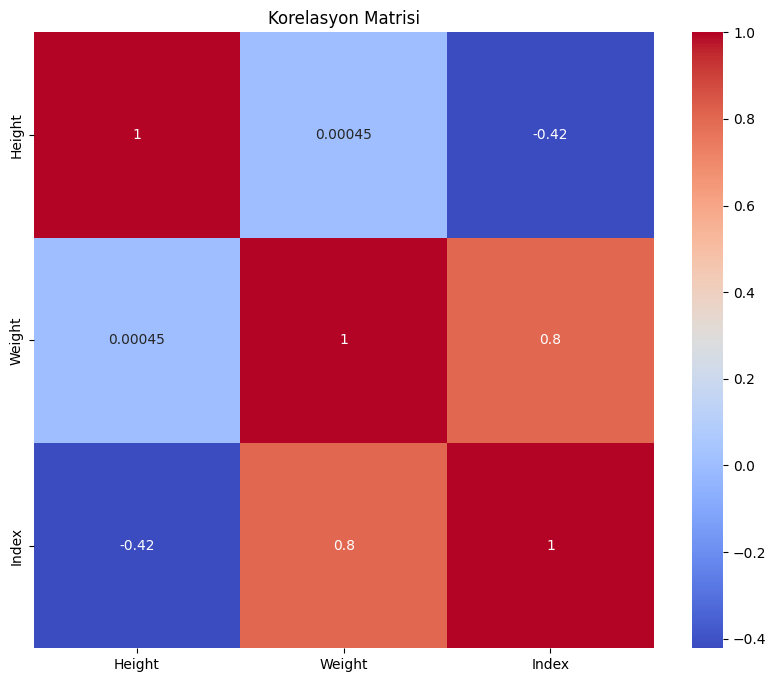

In [4]:
data_correlation = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

İkili grafiklerine baktığımız zaman aralarında lineer bir ilişki olduğu gözlenmekte. Doğrusal çizgiler ile index değerleri birbirlerinden ayrılabilir gözükmekte. 

c:\ProgramData\miniforge3\envs\YAP470\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


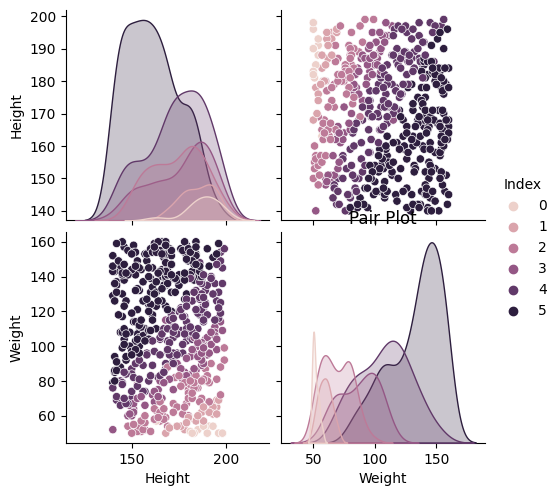

In [5]:
sns.pairplot(data, hue="Index")
plt.title("Pair Plot")
plt.show()

İkisinin ayrı ayrı çizgi grafiklerine baktığımızda da doğrusal bir ilişki gözlenebilmekte. Ağırlık ile olan lineer ilişki boya oranla çok daha yüksektir. Korelasyon matrisi ile burdaki grafiklerin birbirini doğruladığını görebiliriz.

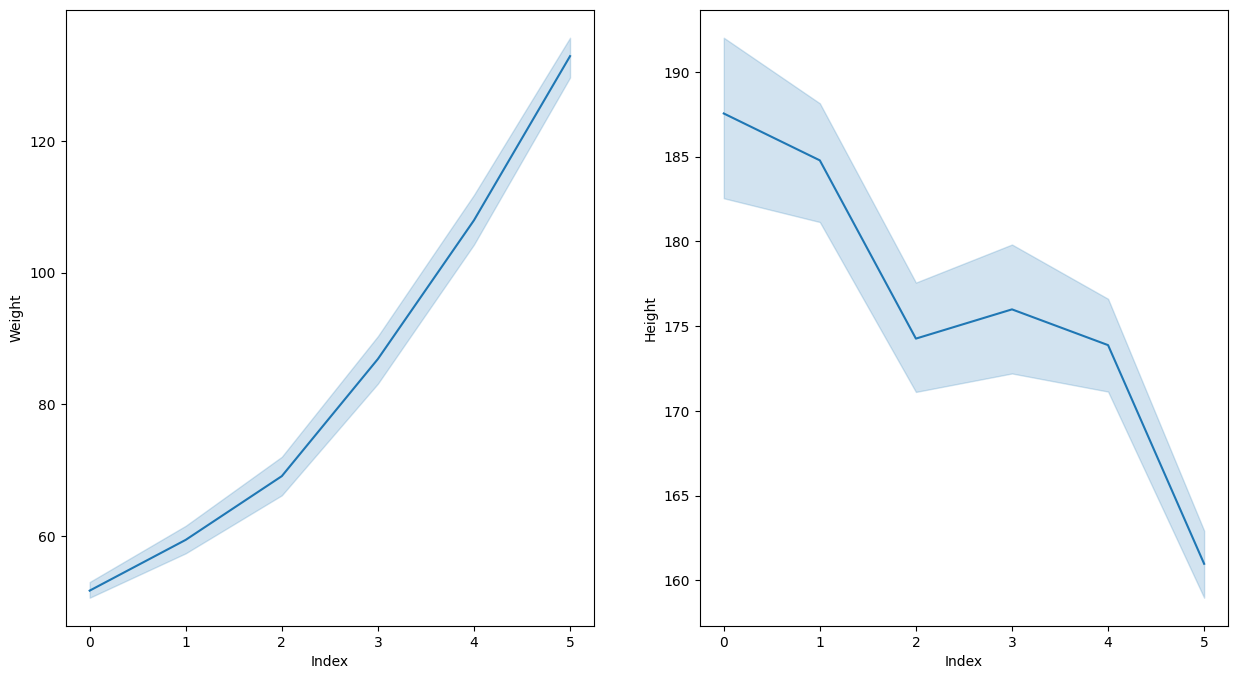

In [6]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(x=data['Index'], y=data['Weight'], ax=ax[0])
sns.lineplot(x=data['Index'], y=data['Height'], ax=ax[1])
plt.show()

Buradaki grafiklerde ise daha çok data noktaları incelenmekte. Kilo ve boy arasında doğrudan bir ilişki gözlenemese de vücut kitle indeksi ile boy ve kilo arasında oldukça doğrusal bir ilişki gözlenmektedir. 
Ayrıca her iki girdiyi de alarak çizdirdiğimiz 3d grafik üzerinden çok bir bilgi okunamasa da görsellik açısından veri noktalarının daha iyi anlaşılması sağlanmıştır.

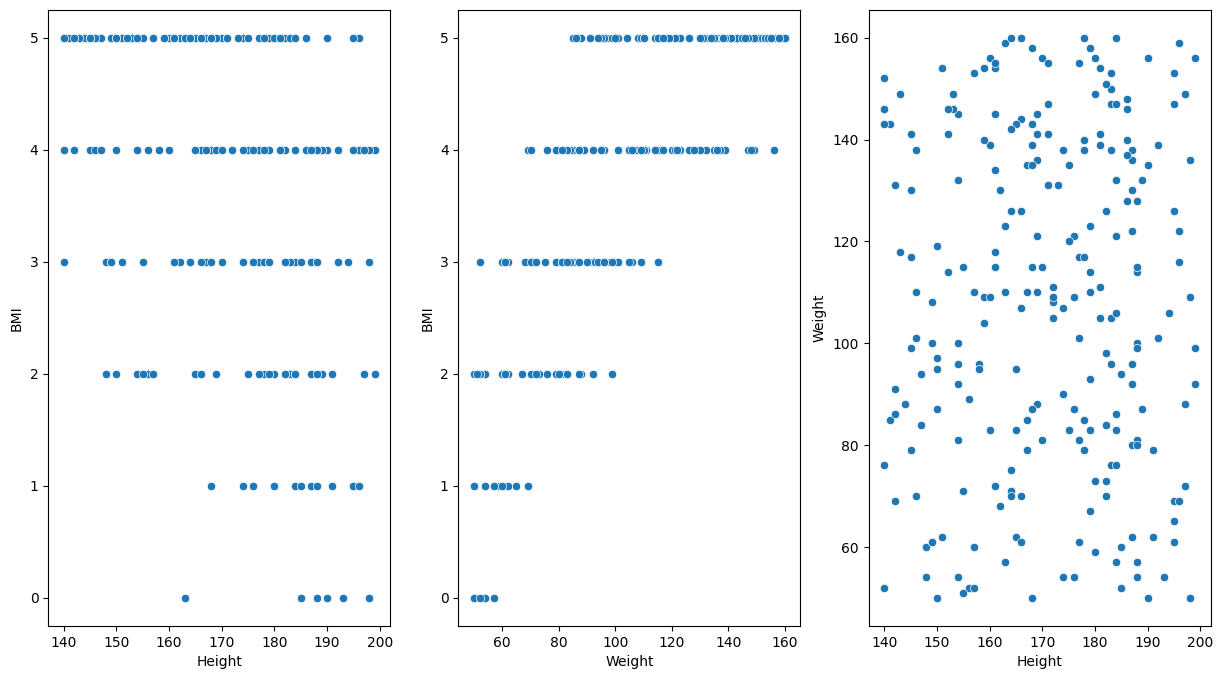

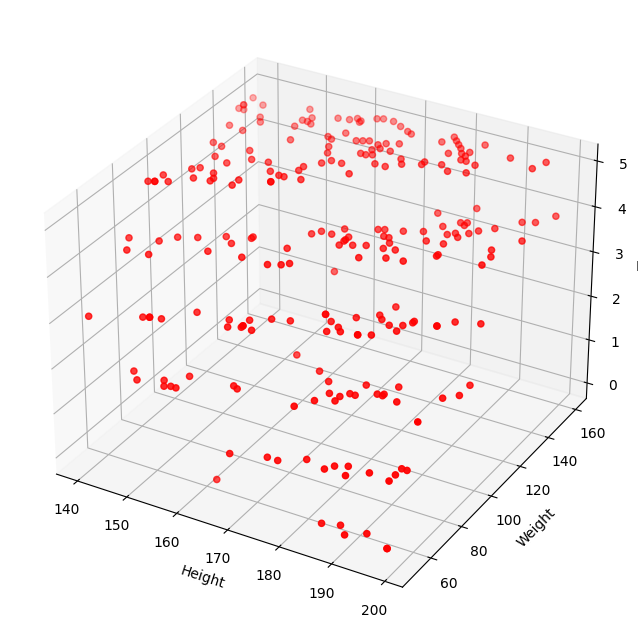

In [7]:
data_list = data.values.tolist()
X = [row[:2]for row in data_list]
y = [row[2:3]for row in data_list]
y = [item for sublist in y for item in sublist]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
height = [row[0]for row in X_train]
weight = [row[1]for row in X_train]

fig, ax= plt.subplots(1,3, figsize=(15,8))
sns.scatterplot(x=height, y=y_train, ax=ax[0])
ax[0].set_xlabel('Height')
ax[0].set_ylabel('BMI')
sns.scatterplot(x=weight, y=y_train, ax=ax[1])
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('BMI')
sns.scatterplot(x=height, y=weight, ax=ax[2])
ax[2].set_xlabel('Height')
ax[2].set_ylabel('Weight')  
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(height, weight, y_train, c='r', marker='o')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')
plt.show()

Tanımlanan lineer regresyon class'ı kullanılarak ve ödevde verilen parametrelerle eğitim yapılmaktadır. Modelin başarımının ölçüsünü belirleyebilmek için test verileri üzerinden tahmin yapılmaktadır.

In [22]:
lr = LinearRegression(learning_rate=0.000005, num_epochs=1000)
lr.fit(height, weight, y_train)
new_height = [row[0]for row in X_test]
new_weight = [row[1]for row in X_test]
y_pred = lr.predict(new_height, new_weight)
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.6390213809134486
Mean squared error:  0.6441302478980424
Mean absolute error:  0.625612067711276
Root mean squared error:  0.8025772535388992


In [15]:
loss_train = []
accuracy_train = []
loss_test = []
accuracy_test = []
for i in range(1000):
    lr = LinearRegression(learning_rate=0.000005, num_epochs=i)
    lr.fit(height, weight, y_train)
    new_height = [row[0]for row in X_test]
    new_weight = [row[1]for row in X_test]
    y_pred_test = lr.predict(new_height, new_weight)
    y_pred_train = lr.predict(height, weight)
    loss_train.append(mean_squared_error(y_train, y_pred_train))
    accuracy_train.append(r2_score(y_train, y_pred_train))
    loss_test.append(mean_squared_error(y_test, y_pred_test))
    accuracy_test.append(r2_score(y_test, y_pred_test))


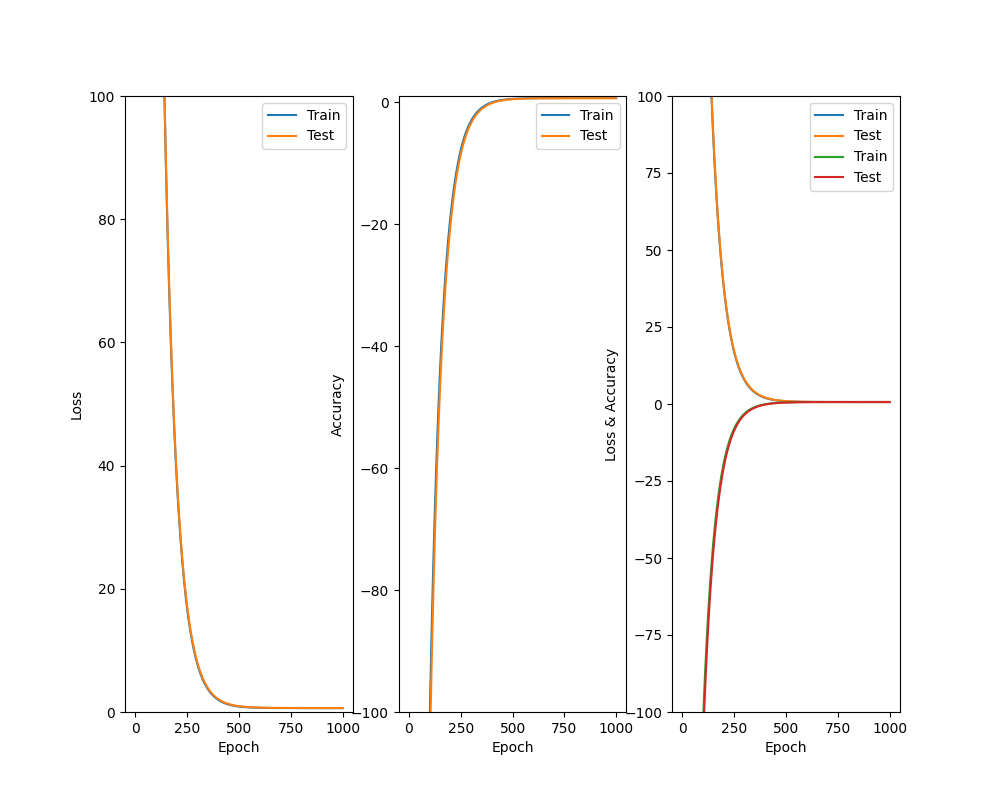

In [21]:
fig, ax= plt.subplots(1,3, figsize=(10,8))
ax[0].plot(range(1000), loss_train, label='Train')
ax[0].plot(range(1000), loss_test, label='Test')
ax[0].set_ylim([0, 100])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(range(1000), accuracy_train, label='Train')
ax[1].plot(range(1000), accuracy_test, label='Test')
ax[1].set_ylim([-100, 1])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[2].plot(range(1000), loss_train, label='Train')
ax[2].plot(range(1000), loss_test, label='Test')
ax[2].plot(range(1000), accuracy_train, label='Train')
ax[2].plot(range(1000), accuracy_test, label='Test')
ax[2].set_ylim([-100, 100])
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss & Accuracy')
ax[2].legend()
plt.show()
